In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/gold_price_cleaned.csv")
df.head()

,Year,Month,Gold_Price_INR_per_10g,Date
0,2019,1,34190,2019-01-01
1,2019,2,34700,2019-02-01
2,2019,3,35220,2019-03-01
3,2019,4,35750,2019-04-01
4,2019,5,36080,2019-05-01


In [ ]:
# Convert Date column back to datetime (CSV stores it as text)
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year                    84 non-null     int64         
 1   Month                   84 non-null     int64         
 2   Gold_Price_INR_per_10g  84 non-null     int64         
 3   Date                    84 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.8 KB


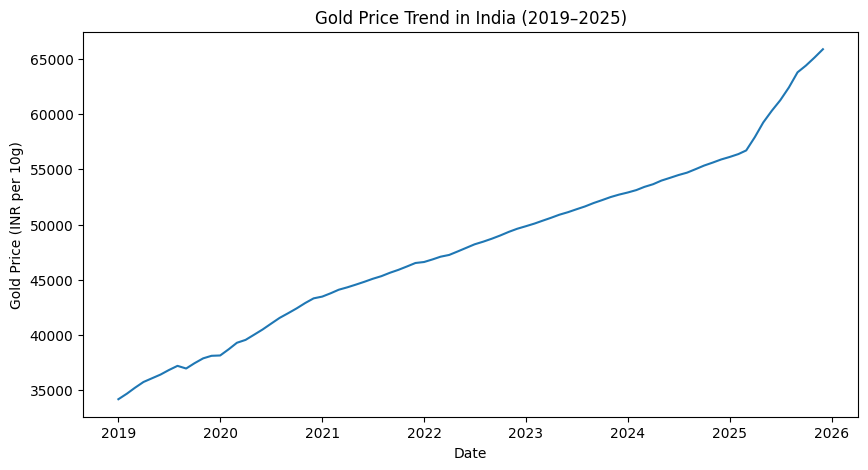

In [ ]:
# Plot the gold price trend over time to visualize long-term movement
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Gold_Price_INR_per_10g'])
plt.xlabel("Date")
plt.ylabel("Gold Price (INR per 10g)")
plt.title("Gold Price Trend in India (2019–2025)")
plt.show()


In [ ]:
# Calculate the average gold price for each year
yearly_avg = df.groupby('Year')['Gold_Price_INR_per_10g'].mean()
yearly_avg


Year
2019    36402.500000
2020    40785.833333
2021    44980.000000
2022    48050.000000
2023    51273.333333
2024    54360.833333
2025    60791.666667
Name: Gold_Price_INR_per_10g, dtype: float64

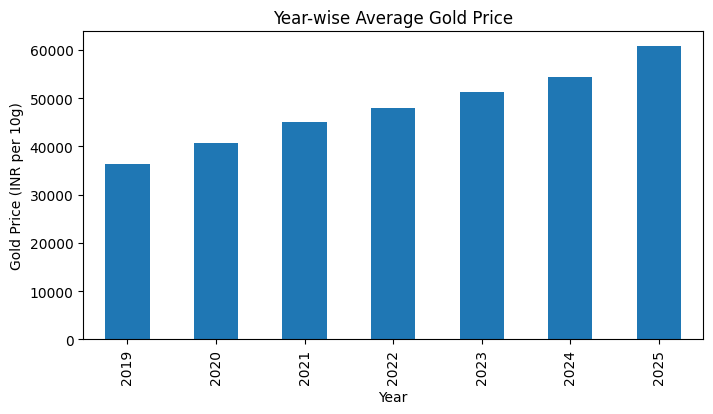

In [ ]:
# Visualize the year-wise average gold price using a bar chart
plt.figure(figsize=(8,4))
yearly_avg.plot(kind='bar')
plt.title("Year-wise Average Gold Price")
plt.xlabel("Year")
plt.ylabel("Gold Price (INR per 10g)")
plt.show()


In [ ]:
# Calculate the average gold price for each month across all years
monthly_avg = df.groupby("Month")["Gold_Price_INR_per_10g"].mean()
monthly_avg

Month
1     45900.000000
2     46235.714286
3     46595.714286
4     47008.571429
5     47475.714286
6     47898.571429
7     48322.857143
8     48755.714286
9     49151.428571
10    49530.000000
11    49937.142857
12    50292.857143
Name: Gold_Price_INR_per_10g, dtype: float64

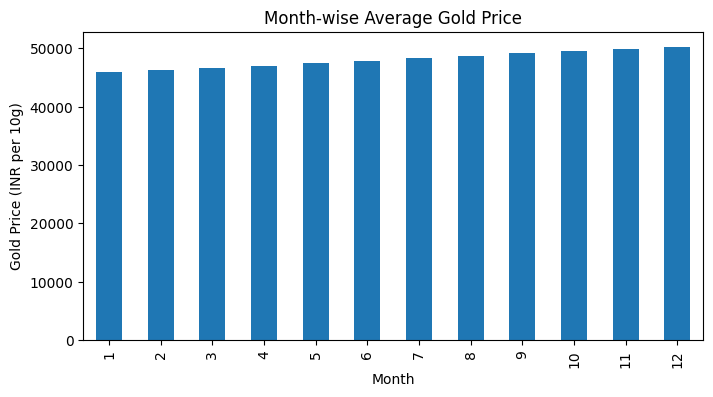

In [ ]:
# Visualize the month-wise average gold price using a bar chart
plt.figure(figsize=(8,4))
monthly_avg.plot(kind="bar")
plt.title("Month-wise Average Gold Price")
plt.xlabel("Month")
plt.ylabel("Gold Price (INR per 10g)")
plt.show()


In [ ]:
# Calculate the month-over-month change in gold price to analyze volatility
df['Monthly_Change'] = df['Gold_Price_INR_per_10g'].diff()
df[['Date', 'Monthly_Change']].head()


,Date,Monthly_Change
0,2019-01-01,NaN
1,2019-02-01,510.0
2,2019-03-01,520.0
3,2019-04-01,530.0
4,2019-05-01,330.0


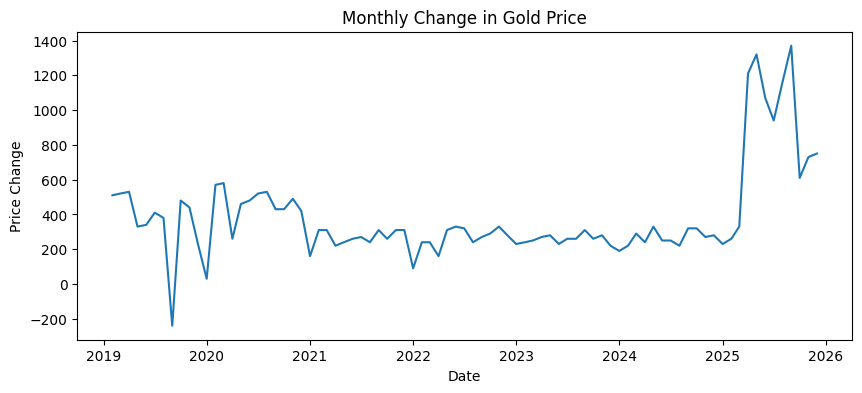

In [ ]:
# Visualize the monthly change in gold price to identify periods of high volatility
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Monthly_Change'])
plt.title("Monthly Change in Gold Price")
plt.xlabel("Date")
plt.ylabel("Price Change")
plt.show()


In [ ]:
# Calculate the rolling average (moving average) of gold price to smooth out short-term fluctuations
df['Rolling_6_Month'] = df['Gold_Price_INR_per_10g'].rolling(window=6).mean()


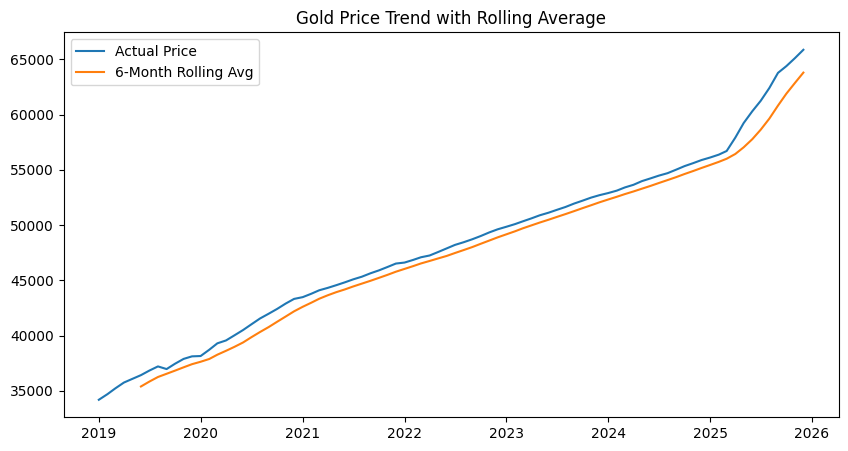

In [ ]:
# Visualize the gold price trend along with the rolling average to see the overall trend more clearly
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Gold_Price_INR_per_10g'], label='Actual Price')
plt.plot(df['Date'], df['Rolling_6_Month'], label='6-Month Rolling Avg')
plt.legend()
plt.title("Gold Price Trend with Rolling Average")
plt.show()


In [ ]:
# Calculate the year-over-year percentage change in average gold price to analyze growth
yearly_growth = yearly_avg.pct_change() * 100
yearly_growth


Year
2019          NaN
2020    12.041298
2021    10.283391
2022     6.825256
2023     6.708290
2024     6.021649
2025    11.829902
Name: Gold_Price_INR_per_10g, dtype: float64

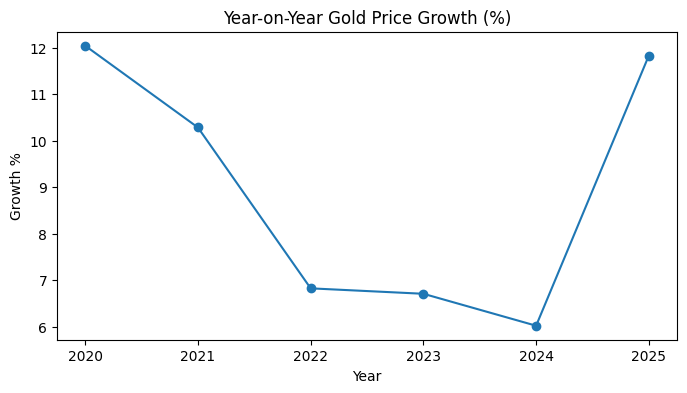

In [ ]:
# Visualize the year-on-year growth in gold price to see how it has evolved over time
plt.figure(figsize=(8,4))
yearly_growth.plot(marker='o')
plt.title("Year-on-Year Gold Price Growth (%)")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.show()


### EDA Insights

- Gold prices show a strong upward trend from 2019 to 2025
- Prices increased more rapidly after 2024
- Month-wise analysis shows mild seasonal variation
- Rolling average confirms long-term growth trend
- Year-on-year growth highlights recent acceleration in gold prices
